# Desafio Técnico - Cientista de Dados Júnior

### Código Fonte das respostas do questionário

##### Autor: Thiago Vilarinho Lemes 
##### Data: 12/02/2024

In [1]:
# Importando as bibliotecas necessárias
from google.cloud import bigquery
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Arquivo com a configurações para acessar o GCP
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = './key_only_read.json'

# Nome do projeto no GCP
project_id = 'projeto-desafio-dados-rio'

client = bigquery.Client(project=project_id)

# Base de Dados Chamado 1746
query_chamado_1746      = "SELECT * FROM datario.administracao_servicos_publicos.chamado_1746 LIMIT 50000;"
df_query_chamado_1746   = client.query(query_chamado_1746).to_dataframe()

# Base de Dados dos Bairros
query_bairro = "SELECT * FROM datario.dados_mestres.bairro;"
df_query_bairro   = client.query(query_bairro).to_dataframe()

# Base de Dados Eventos
query_eventos           = "SELECT * FROM datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos;"
df_query_eventos        = client.query(query_eventos).to_dataframe()

In [3]:
print("Dataframe Chamado 1746")
df_query_chamado_1746.head(2)

Dataframe Chamado 1746


,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,...,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,geometry
0,852072,2011-12-14 19:44:59,NaT,122,4,49072,674,9,CGC - Coordenadoria Geral de Conservação,SECONSERVA,...,<NA>,D,D,Fora do prazo,Não Encerrado,Andamento,None,0,2011-12-01,POINT(-43.3868685 -22.9171405)
1,828573,2011-12-06 11:09:28,NaT,142,5,18226,3470,9,CGC - Coordenadoria Geral de Conservação,SECONSERVA,...,<NA>,D,D,Fora do prazo,Não Encerrado,Andamento,None,0,2011-12-01,None


In [4]:
print("Dataframe Bairro")
df_query_bairro.head(2)

Dataframe Bairro


,id_bairro,nome,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometry_wkt,geometry
0,2,Gamboa,1,1.1,Centro,1,Portuaria,Centro,1.112903e+06,4612.833630,POLYGON ((-43.18791509600138 -22.8931217212322...,"POLYGON((-43.1879150960014 -22.8931217212322, ..."
1,1,Saúde,1,1.1,Centro,1,Portuaria,Centro,3.638176e+05,2646.220568,POLYGON ((-43.181151633502964 -22.895430284304...,"POLYGON((-43.181151633503 -22.8954302843042, -..."


In [5]:
print("Dataframe Eventos")
df_query_eventos.head()

Dataframe Eventos


,ano,data_inicial,data_final,evento,taxa_ocupacao
0,18/02 a 21/02 de 2023,2023-02-18,2023-02-21,Carnaval,0.9554
1,30-31/12 e 01/01 (2022-2023),2022-12-30,2023-01-01,Reveillon,0.9251
2,02/09 a 04/09 de 2022,2022-09-02,2022-09-04,Rock in Rio,0.8184
3,08/09 a 11/09 de 2022,2022-09-08,2022-09-11,Rock in Rio,0.9451


Questão 1) Quantos chamados foram abertos no dia 01/04/2023?

In [6]:
# Query de consulta
query  = "SELECT * FROM datario.administracao_servicos_publicos.chamado_1746 WHERE DATE(data_inicio) = '2023-04-01'"

# Realizando a consulta no Banco de Dados
df_chamado_1746         = client.query(query).to_dataframe()
chamados                = df_chamado_1746.shape
print(f"Total de chamados no dia 01/04/2023: {chamados[0]} chamados")

Total de chamados no dia 01/04/2023: 73 chamados


Questão 02) Qual o tipo de chamado que teve mais reclamações no dia 01/04/2023?

In [7]:
# Query de consulta
query  = "SELECT tipo, COUNT(tipo) AS total_reclamacoes FROM datario.administracao_servicos_publicos.chamado_1746 \
    WHERE DATE(data_inicio) = '2023-04-01' \
    GROUP BY tipo \
    ORDER BY total_reclamacoes DESC;"

# Realizando a consulta no Banco de Dados
df_chamado_1746         = client.query(query).to_dataframe()

# Criando Dataframe com os dados consultados
df_chamado_1746         = pd.DataFrame(df_chamado_1746, index=None).reset_index()

# Renomeando coluna 'f0_' para 'tipo'
df_chamado_1746 = df_chamado_1746.rename(columns= {'f0_': 'tipo'})
print(f"Os chamados de maiores reclamações no dia 01/04/2023 foi do tipo: {df_chamado_1746['tipo'][0]}")

Os chamados de maiores reclamações no dia 01/04/2023 foi do tipo: Poluição sonora


Questão 3) Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [8]:
# Query de consulta
query                   = "SELECT * FROM datario.administracao_servicos_publicos.chamado_1746 \
                            WHERE DATE(data_inicio) = '2023-04-01'"

# Realizando a consulta no Banco de Dados
df_chamado_1746         = client.query(query).to_dataframe()

# Query de consulta
query_bairro            = "SELECT * FROM datario.dados_mestres.bairro;"

# Realizando a consulta no Banco de Dados
df_query_bairro         = client.query(query_bairro).to_dataframe()

# Agrupando as tabelas chamado_1746 e bairro por id_bairro
chamados_bairro = df_chamado_1746.merge(df_query_bairro, how='inner', on=['id_bairro','id_bairro'])

# Criando Dataframe com os dados consultados 
chamados_bairro = pd.DataFrame(chamados_bairro)

# Fazendo a contagem dos 3 bairros que mais tiveram chamados
top_chamados_bairros = chamados_bairro['nome'].value_counts().nlargest(3)
print(f"Os 3 bairros que tiveram mais chamados no dia 01/04/2023 foram: \n{top_chamados_bairros}")


Os 3 bairros que tiveram mais chamados no dia 01/04/2023 foram: 
Engenho de Dentro    8
Leblon               6
Campo Grande         6
Name: nome, dtype: int64


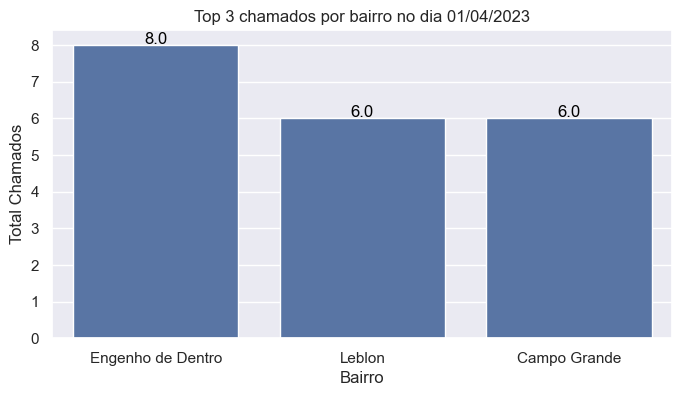

In [10]:
# Dados do gráfico
bairro = top_chamados_bairros.index 
chamados = top_chamados_bairros.values

# Criando o gráfico de barras
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
plot =sns.barplot(x=bairro, y=chamados)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
# Customizando o gráfico
plt.title('Top 3 chamados por bairro no dia 01/04/2023')
plt.xlabel('Bairro')
plt.ylabel('Total Chamados')

# Plotando o gráfico
plt.show()

Questão 4) Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [11]:
# Query de consulta
query                   = "SELECT * FROM datario.administracao_servicos_publicos.chamado_1746 \
                            WHERE DATE(data_inicio) = '2023-04-01'"

# Realizando a consulta no Banco de Dados
df_chamado_1746         = client.query(query).to_dataframe()

# Query de consulta
query_bairro            = "SELECT * FROM datario.dados_mestres.bairro;"

# Realizando a consulta no Banco de Dados
df_query_bairro         = client.query(query_bairro).to_dataframe()

# Agrupando as tabelas chamado_1746 e bairro por id_bairro
chamados_bairro_subprefeitura = df_chamado_1746.merge(df_query_bairro, how='inner', on=['id_bairro','id_bairro'])

# Criando Dataframe com os dados agrupados acima 
chamados_bairro_subprefeitura = pd.DataFrame(chamados_bairro_subprefeitura)

# Realizando contagem dos valores do campo subprefeitura iguais
top_chamados_bairro_subprefeitura = chamados_bairro_subprefeitura['subprefeitura'].value_counts()

# Criando Dataframe e renomeando os campos subprefeitura e index para respectivamente chamados e subprefeitura
top_chamados_bairro_subprefeitura = pd.DataFrame(top_chamados_bairro_subprefeitura).reset_index() \
                                            .rename(columns= {'subprefeitura': 'chamados'}) \
                                            .rename(columns= {'index': 'subprefeitura'})

print(f"A subprefeitura com maior número de chamados no dia 01/04/2023: {top_chamados_bairro_subprefeitura['subprefeitura'][0]}")

A subprefeitura com maior número de chamados no dia 01/04/2023: Zona Norte


Questão 5) Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [ ]:
'''Resp.: Sim. Isso acontece no momento do cadastro do chamado em que o usuário não insere os dados corretamente, 
assim como, pode não está cadastrado o bairro ou subprefeitura no sitema impossibilitando sua inserção no cadastro, 
ou até mesmo, erro durante a migração dos dados para a cloud, causando ruído nos dados.'''

Questão 6) Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [13]:
# Query de consulta
query               = "SELECT COUNT(id_chamado) FROM datario.administracao_servicos_publicos.chamado_1746 \
                            WHERE DATE(data_inicio) >= '2022-01-01' \
                                AND DATE(data_inicio) <= '2023-12-31' \
                                AND subtipo='Perturbação do sossego'"

# Realizando a consulta no Banco de Dados
df_chamados_subtipo         = client.query(query).to_dataframe()

# Criando Dataframe
df_chamados_subtipo         = pd.DataFrame(df_chamados_subtipo, index=None).reset_index()

# Renomeando a coluna 'f0_' para 'df_chamados'
df_chamados_subtipo = df_chamados_subtipo.rename(columns= {'f0_': 'df_chamados'})
print(f"Foram realizados entre os dias 01/01/2022 até 31/12/2023 com subtipo 'Pertubação do sosego': {df_chamados_subtipo['df_chamados'].to_string(index=False)} chamados")


Foram realizados entre os dias 01/01/2022 até 31/12/2023 com subtipo 'Pertubação do sosego': 42408 chamados


Questão 7) Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [3]:
# Query de consulta
query                = '''WITH cte_chamado_1746 AS (
                            SELECT * 
                            FROM `datario.administracao_servicos_publicos.chamado_1746` 
                            WHERE subtipo = "Perturbação do sossego"                 
                    )
                    SELECT c.id_chamado, DATE(c.data_inicio) AS data_inicio,  b.evento, c.subtipo,
                    FROM cte_chamado_1746 AS c
                    INNER JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` AS b
                    ON DATE(c.data_inicio) BETWEEN DATE(b.data_inicial) AND DATE(b.data_final)  
                    GROUP BY 
                        id_chamado, 
                        b.evento, 
                        c.subtipo, 
                        data_inicio
                    ORDER BY 
                        data_inicio'''

# Realizando a consulta no Banco de Dados
df_chamados_evento   = client.query(query).to_dataframe()

# Criando Dataframe
df_chamados_evento   = pd.DataFrame(df_chamados_evento)

# Imprimindo os 5 primeiros valores do Dataframe
df_chamados_evento.head(5)

,id_chamado,data_inicio,evento,subtipo
0,17658447,2022-09-02,Rock in Rio,Perturbação do sossego
1,17661581,2022-09-02,Rock in Rio,Perturbação do sossego
2,17658261,2022-09-02,Rock in Rio,Perturbação do sossego
3,17658529,2022-09-02,Rock in Rio,Perturbação do sossego
4,17661757,2022-09-02,Rock in Rio,Perturbação do sossego


8) Quantos chamados desse subtipo foram abertos em cada evento?

In [4]:
# Query de consulta
query                   = '''WITH cte_chamado_1746 AS (
                                SELECT * 
                                FROM `datario.administracao_servicos_publicos.chamado_1746` 
                                WHERE subtipo = "Perturbação do sossego"                 
                        )
                        SELECT b.evento, c.subtipo, COUNT(b.evento) AS total_chamados_subtipo_evento
                        FROM cte_chamado_1746 AS c
                        INNER JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` AS b
                        ON DATE(c.data_inicio) BETWEEN DATE(b.data_inicial) AND DATE(b.data_final)  
                        GROUP BY 
                            b.evento, 
                            c.subtipo
                        ORDER BY
                            total_chamados_subtipo_evento DESC'''
# Realizando a consulta no Banco de Dados
df_chamados_subtipo_evento   = client.query(query).to_dataframe()

# Criando Dataframe
df_chamados_subtipo_evento   = pd.DataFrame(df_chamados_subtipo_evento)

# Imprimindo a consulta
print(f"Foram abertos o total de chamados para cada evento: \n {df_chamados_subtipo_evento}")

Foram abertos o total de chamados para cada evento: 
         evento                 subtipo  total_chamados_subtipo_evento
0  Rock in Rio  Perturbação do sossego                            834
1     Carnaval  Perturbação do sossego                            241
2    Reveillon  Perturbação do sossego                            137


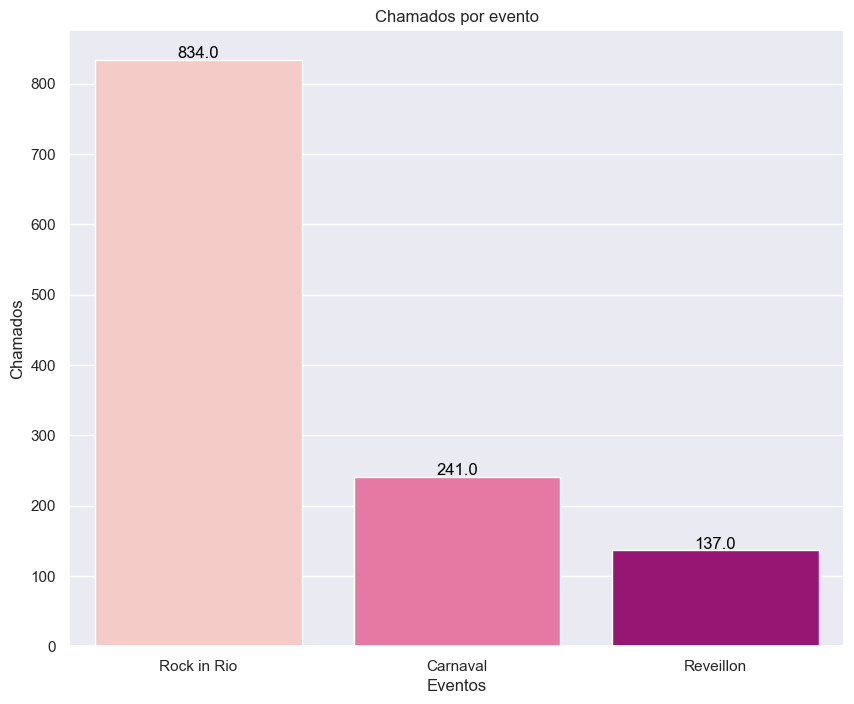

In [5]:
# Criando o gráfico de Barra
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
plot = sns.barplot(df_chamados_subtipo_evento, x='evento', y='total_chamados_subtipo_evento', \
                   hue='evento', palette='RdPu')

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

# Customize the plot
plt.title('Chamados por evento')
plt.xlabel('Eventos')
plt.ylabel('Chamados')

# Show the plot
plt.show()

9) Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [6]:
# Query de consulta
query                   = '''WITH
                                cte_chamado_1746 AS (
                                    SELECT * 
                                    FROM `datario.administracao_servicos_publicos.chamado_1746` 
                                    WHERE subtipo="Perturbação do sossego"
                                ),
                                cte_media_diaria AS (
                                    SELECT 
                                        b.evento, 
                                        DATE(c.data_inicio) AS data_inicio,
                                        COUNT(b.evento) AS total_evento_subtipo
                                    FROM cte_chamado_1746 AS c
                                    INNER JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` AS b
                                    ON DATE(c.data_inicio) BETWEEN DATE(b.data_inicial) AND DATE(b.data_final)
                                    GROUP BY
                                        b.evento, 
                                        DATE(c.data_inicio)
                                )
                                SELECT 
                                    e.evento, 
                                    AVG(e.total_evento_subtipo) AS media_diaria
                                FROM cte_media_diaria AS e
                                GROUP BY 
                                    e.evento
                                ORDER BY 
                                    media_diaria DESC;'''
# Realizando a consulta no Banco de Dados
df_chamados_evento_media_diaria   = client.query(query).to_dataframe()

# Criando Dataframe
df_chamados_evento_media_diaria   = pd.DataFrame(df_chamados_evento_media_diaria)

# Imprimindo a consulta
print(f"O evento que teve a maior média diária de chamados abertos desse subtipo: {df_chamados_evento_media_diaria['evento'][0]}")

O evento que teve a maior média diária de chamados abertos desse subtipo: Rock in Rio


10) Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a 
média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [7]:
query               = '''WITH
                            cte_chamado_1746 AS (
                                SELECT * 
                                FROM `datario.administracao_servicos_publicos.chamado_1746` 
                                WHERE subtipo = "Perturbação do sossego"
                            ),
                            cte_chamado_evento AS (
                                SELECT 
                                DATE(c.data_inicio) AS data_inicio,
                                b.evento, 
                                COUNT(b.evento) AS total_evento_subtipo
                                FROM cte_chamado_1746 AS c
                                INNER JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` AS b
                                ON DATE(c.data_inicio) BETWEEN DATE('2022-01-01') AND DATE('2023-12-31')
                                GROUP BY
                                b.evento,
                                data_inicio
                            )
                            SELECT 
                            evento,
                            AVG(d.total_evento_subtipo) AS total
                            FROM cte_chamado_evento AS d
                            GROUP BY 
                            d.evento'''

# Realizando a consulta no Banco de Dados
df_chamados_evento_periodo   = client.query(query).to_dataframe()

# Criando Dataframe
df_chamados_evento_periodo   = pd.DataFrame(df_chamados_evento_periodo)

# Imprimindo a consulta
print(f"A Média do periódo 01/01/2022 e 31/12/2023 pelo subtipo 'Perturbação do sossego' e pelos eventos foram: \n{df_chamados_evento_periodo.head()}")

A Média do periódo 01/01/2022 e 31/12/2023 pelo subtipo 'Perturbação do sossego' e pelos eventos foram: 
        evento       total
0    Reveillon   63.201192
1     Carnaval   63.201192
2  Rock in Rio  126.402385


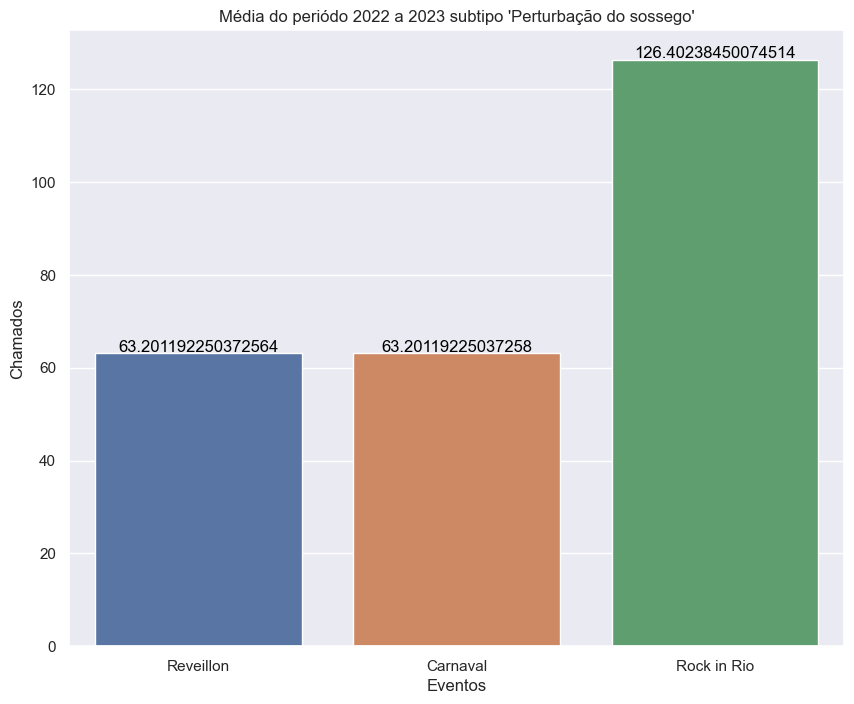

In [8]:
# Criando o gráfico de Barra
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
plot = sns.barplot(df_chamados_evento_periodo, x='evento', y='total', \
                   hue='evento', palette='deep')

for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

# Customize the plot
plt.title("Média do periódo 2022 a 2023 subtipo 'Perturbação do sossego'")
plt.xlabel('Eventos')
plt.ylabel('Chamados')

# Show the plot
plt.show();